## Data preparation

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
customers = pd.read_csv("C:/Users/ander/LightHouseNotes/mini-project-III/Data/twm_customer.csv", sep = ";")
customers = customers[['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'city_name']]
customers['city_name'] = customers['city_name'].str.strip()
customers

cust_id  income  age  years_with_bank  nbr_children gender      city_name
0    1362691   26150   46                5             1     M       Las Vegas
1    1362487    6605   71                1             0     M     Los Angeles
2    1363160   18548   38                8             0     F     Los Angeles
3    1362752   47668   54                3             0     F     Los Angeles
4    1362548   44554   59                9             2     F   New York City
..       ...     ...  ...              ...           ...    ...            ...
742  1363324   14795   36                6             1     F     Los Angeles
743  1362895   26387   56                6             1     M   New York City
744  1362569   61300   50                0             2     M     Albuquerque
745  1363364   15100   37                7             0     F      Birmingham
746  1363303   17875   18                3             0     F     Los Angeles

[747 rows x 7 columns]

In [4]:
#average amount per transaction
transactions = pd.read_csv("C:/Users/ander/LightHouseNotes/mini-project-III/Data/twm_transactions.csv", sep = ";")
transactions['tran_amt'] = abs(transactions['tran_amt'])
transactions = transactions.groupby('acct_nbr').agg({'principal_amt': 'count', 'tran_amt': 'sum'}).reset_index()
transactions['avg(amount/tran)'] = transactions['tran_amt']/transactions['principal_amt']
transactions = transactions.drop(columns=['principal_amt','tran_amt'])

transactions.head(3)


acct_nbr  avg(amount/tran)
0  13624802        140.497475
1  13624803        128.769231
2  13624842         77.955758

In [17]:
#selecting active accounts and relevant columns
accounts = pd.read_csv("C:/Users/ander/LightHouseNotes/mini-project-III/Data/twm_accounts.csv", sep = ";")
accounts['account_active'] = accounts['account_active'].str.strip()
accounts['acct_type'] = accounts['acct_type'].str.strip()
accounts = accounts[accounts.account_active == "Y"]
accounts1 = accounts[['acct_nbr','cust_id']]

accounts1



acct_nbr  cust_id
0             13628063  1362806
1     4561143213627090  1362709
2     4561143213628360  1362836
3             13633112  1363311
4     4561143213633610  1363361
...                ...      ...
1403          13626022  1362602
1405  4561143213626240  1362624
1406  4561143213628750  1362875
1407          13626543  1362654
1408          13627032  1362703

[1266 rows x 2 columns]

In [20]:
credit_acct = pd.read_csv("C:/Users/ander/LightHouseNotes/mini-project-III/Data/twm_credit_acct.csv", sep = ";")
savings_acct = pd.read_csv("C:/Users/ander/LightHouseNotes/mini-project-III/Data/twm_savings_acct.csv", sep = ";")

results = accounts1.merge(transactions, how='left', on='acct_nbr')
results = results.groupby(['cust_id']).sum().reset_index()
results = results.drop(columns = 'acct_nbr')

results = results.merge(credit_acct[['cust_id','ending_balance']], how='left', on='cust_id')
results = results.merge(savings_acct[['cust_id','ending_balance']], how='left', on='cust_id')
results = results.merge(accounts[accounts.acct_type == "CK"][['cust_id', 'ending_balance']], how='left', on='cust_id')

results = results.rename(columns = {'ending_balance_x':'credit_balance', 'ending_balance_y': 'savings_balance','ending_balance': 'checking_balance'})
results[['credit_balance','savings_balance','checking_balance']] = results[['credit_balance','savings_balance','checking_balance']].replace(0,1)
results[['credit_balance','savings_balance','checking_balance']] = results[['credit_balance','savings_balance','checking_balance']].fillna(0)

results = results.merge(customers, how='inner', on='cust_id')

results


cust_id  avg(amount/tran)  credit_balance  savings_balance  \
0    1362480        269.266706           20.00          1187.97   
1    1362484        381.386000          369.72          2122.17   
2    1362485        278.479306         1100.00             0.00   
3    1362486         98.289600            0.00           116.24   
4    1362487        211.563389         1548.23            12.89   
..       ...               ...             ...              ...   
637  1363486          0.000000            1.00             0.00   
638  1363490          2.853333            0.00          2301.53   
639  1363492       1103.970502         6869.00          1116.10   
640  1363493        147.857778            1.00           553.61   
641  1363495        151.126263            0.00          2783.16   

     checking_balance  income  age  years_with_bank  nbr_children gender  \
0               86.86   50890   33                3             2     M    
1               95.32   10053   42                2             0     F    
2               45.49   22690   25                4             0     F    
3             3312.27   10701   76                6             0     F    
4             1401.21    6605   71                1             0     M    
..                ...     ...  ...              ...           ...    ...   
637              0.00   39942   41                1             5     F    
638              0.00       0   15                7             0     F    
639            106.14  142274   54                4             0     M    
640           2053.90   30068   69                5             0     M    
641            178.50   19639   36                3             3     F    

         city_name  
0    New York City  
1           Denver  
2    New York City  
3           Dallas  
4      Los Angeles  
..             ...  
637       Honolulu  
638       Honolulu  
639         Dallas  
640        Houston  
641  San Francisco  

[642 rows x 11 columns]

In [21]:
results.describe()

cust_id  avg(amount/tran)  credit_balance  savings_balance  \
count  6.420000e+02        642.000000      642.000000       642.000000   
mean   1.362987e+06        267.511660      862.004548       817.514330   
std    2.960027e+02        279.851598     1278.006659      1766.344753   
min    1.362480e+06          0.000000        0.000000         0.000000   
25%    1.362723e+06        121.214861        0.000000         0.000000   
50%    1.362984e+06        215.972650      512.895000       236.190000   
75%    1.363246e+06        312.781014     1014.890000       925.057500   
max    1.363495e+06       4045.654571     9500.000000     22432.780000   

       checking_balance         income         age  years_with_bank  \
count        642.000000     642.000000  642.000000       642.000000   
mean         490.906885   22631.669782   42.543614         3.816199   
std         1050.571339   21698.548454   18.879918         2.695206   
min            0.000000       0.000000   13.000000         0.000000   
25%            0.000000    7440.000000   28.000000         2.000000   
50%           84.740000   17406.500000   41.000000         4.000000   
75%          512.792500   31007.000000   56.000000         6.000000   
max        13185.470000  144157.000000   89.000000         9.000000   

       nbr_children  
count    642.000000  
mean       0.697819  
std        1.104082  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        5.000000

In [22]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 641
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           642 non-null    int64  
 1   avg(amount/tran)  642 non-null    float64
 2   credit_balance    642 non-null    float64
 3   savings_balance   642 non-null    float64
 4   checking_balance  642 non-null    float64
 5   income            642 non-null    int64  
 6   age               642 non-null    int64  
 7   years_with_bank   642 non-null    int64  
 8   nbr_children      642 non-null    int64  
 9   gender            642 non-null    object 
 10  city_name         642 non-null    object 
dtypes: float64(4), int64(5), object(2)
memory usage: 60.2+ KB


<Axes: >

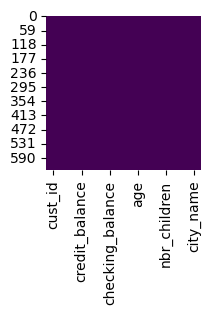

In [23]:
plt.figure(figsize=(2,2))
sns.heatmap(results.isnull(),cbar=False,cmap='viridis')


In [24]:
#checking for wrong entries
for col in results.columns:
    print('{}:{}'.format(col, results[col].unique()))

cust_id:[1362480 1362484 1362485 1362486 1362487 1362488 1362489 1362492 1362496
 1362497 1362498 1362499 1362500 1362501 1362502 1362503 1362505 1362506
 1362507 1362508 1362509 1362510 1362511 1362512 1362513 1362516 1362520
 1362523 1362524 1362525 1362526 1362528 1362529 1362530 1362531 1362535
 1362537 1362540 1362541 1362542 1362546 1362547 1362548 1362549 1362550
 1362551 1362552 1362555 1362556 1362557 1362562 1362563 1362565 1362567
 1362568 1362569 1362570 1362571 1362572 1362573 1362574 1362577 1362578
 1362579 1362580 1362584 1362585 1362586 1362587 1362588 1362589 1362590
 1362591 1362592 1362593 1362594 1362595 1362596 1362597 1362602 1362604
 1362605 1362606 1362607 1362609 1362610 1362611 1362613 1362614 1362617
 1362619 1362620 1362621 1362622 1362623 1362624 1362625 1362630 1362631
 1362632 1362633 1362636 1362637 1362638 1362640 1362641 1362642 1362643
 1362644 1362645 1362649 1362650 1362652 1362653 1362654 1362656 1362657
 1362658 1362659 1362661 1362662 1362663 13

In [25]:
#saving results
results.to_csv('./Data/cluster_data.csv', index = False)